In [42]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from IPython.display import display
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [68]:
# path_data = "/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/2022_4_20_231852_baseline/ch0.txt"
dir_path  = {"Without LED":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/2022_4_21_101721_darkNoise/ch0.txt",
                        "With LED":"/afs/ihep.ac.cn/users/l/luoxj/Data_PMT_test_dEdxExp/2022_4_21_103102_with_LED_2nd/ch0.txt"}

dir_wave2d = {}

for key, path_data in dir_path.items():
    v2d_wave = np.loadtxt(path_data,
               dtype=int, delimiter="\t")
    v2d_wave = v2d_wave[1000:]
    v2d_time = []
    v2d_subtract_baseline = []
    t_center = range( len( v2d_wave[0] ) )
    for i, wave in enumerate( v2d_wave ):
        baseline = np.mean(wave[:100])
        wave = wave - baseline

        if np.min(wave)<-3:
            x_peak = np.argmin( wave )
            wave = wave[x_peak-200:]

            v2d_subtract_baseline.append( wave )
            v2d_time.append( np.arange(len(wave)) )
    dir_wave2d[key] = v2d_subtract_baseline

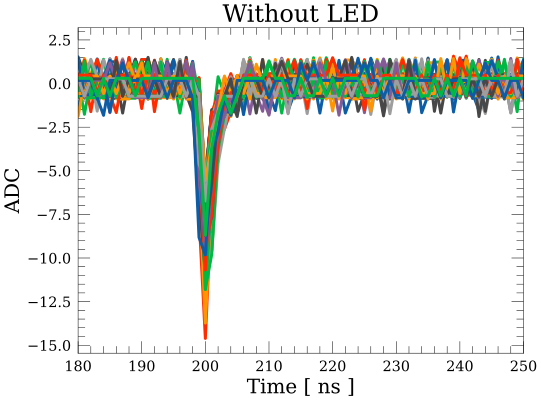

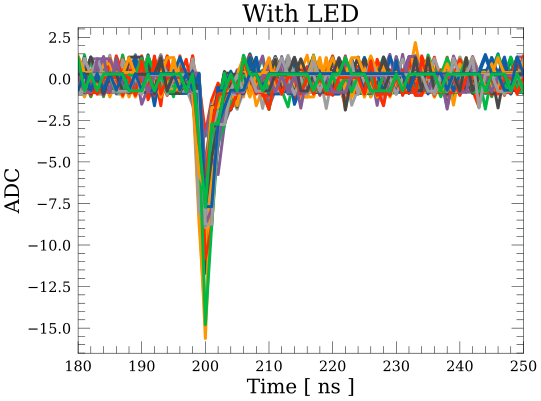

In [75]:
for key, v2d_subtract_baseline in dir_wave2d.items():
    plt.figure()
    for wave in v2d_subtract_baseline[:100]:
        plt.plot(wave)

    plt.xlim(180, 250)
    plt.xlabel("Time [ ns ]")
    plt.ylabel("ADC")
    plt.title(key)

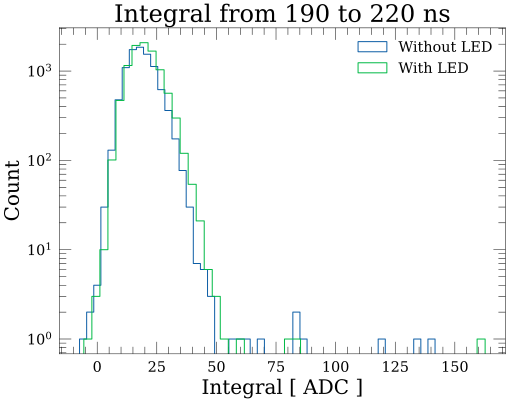

In [74]:
t_start = 190
t_end = 220
for key, v2d_subtract_baseline in dir_wave2d.items():
    v_integral = []
    for wave in v2d_subtract_baseline:
        v_integral.append( -np.sum(wave[t_start:t_end]) )
    plt.hist( v_integral, bins=50, label=key, histtype="step")
    plt.semilogy()
    plt.xlabel("Integral [ ADC ]")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Integral from {t_start} to {t_end} ns")



(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([180.5, 181.5, 182.5, 183.5, 184.5, 185.5, 186.5, 187.5, 188.5,
        189.5, 190.5, 191.5, 192.5, 193.5, 194.5, 195.5, 196.5, 197.5,
        198.5, 199.5, 200.5, 201.5, 202.5, 203.5, 204.5, 205.5, 206.5,
        207.5, 208.5, 209.5, 210.5, 211.5, 212.5, 213.5, 214.5, 215.5,
        216.5, 217.5, 218.5, 219.5, 220.5, 221.5, 222.5, 223.5, 224.5,
        225.5, 226.5, 227.5, 228.5, 229.5, 230.5, 231.5, 232.5, 233.5,
        234.5, 235.5, 236.5, 237.5, 238.5, 239.5, 240.5, 241.5, 242.5,
        243.5, 244.5, 245.5, 246.5, 247.5, 248.5, 249.5]),
 array([-46.52  , -45.7797, -45.0394, -44.2991, -43.5588, -42.8185,
        -42.0782, -41.3379, -40.5976, -39.8573, -39.117 , -38.3767,
        -37.6364, -36.8961, -36.1558, -35.4155, -34.6752, -

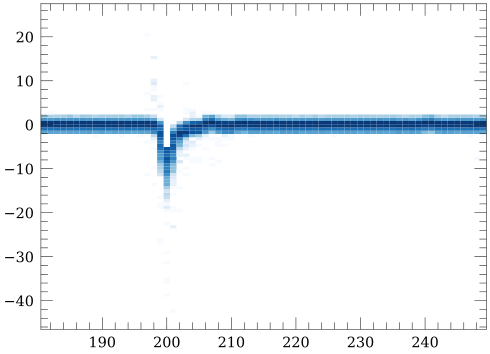

In [57]:
from matplotlib.colors import LogNorm
plt.hist2d( np.concatenate(v2d_time), np.concatenate(v2d_subtract_baseline), bins=(np.arange(180.5,250.5), 100),
            norm=LogNorm(), cmap="Blues")

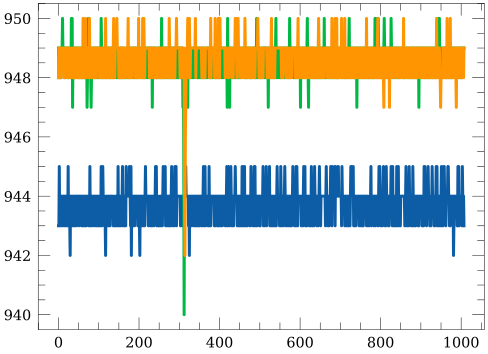

In [48]:
plt.plot(v2d_wave[0])
plt.plot(v2d_wave[1200])
plt.plot(v2d_wave[-1])